In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-cases-deaths/covid 19 CountryWise.csv


<h1>Loading Data</h1>

In [2]:
data = pd.read_csv('/kaggle/input/covid19-cases-deaths/covid 19 CountryWise.csv',thousands=',')
data.head()

,Country,Region,Total Cases,Total Cases per 100k pop,New Cases (7 days),New Cases per 100k pop (7 days),New Cases (24 hours),Total Deaths,Total Deaths per 100k pop,New Deaths (7 days),New Deaths per 100k pop (7 days),New Deaths (24 hours)
0,United States of America,Americas,94152573,28444.658,416281,125.764,76462,1040506,314.350,2590,0.782,624
1,India,South-East Asia,44516479,3225.822,37843,2.742,6422,528250,38.279,160,0.012,34
2,Brazil,Americas,34544377,16251.633,53446,25.144,10420,685002,322.264,422,0.199,104
3,France,Europe,33766090,51916.394,150781,231.830,36147,151062,232.262,217,0.334,38
4,Germany,Europe,32604993,39204.380,203649,244.868,32168,148728,178.831,50,0.060,8


In [3]:
print(data.shape)
print("-----------")
print(data.dtypes)
print("-----------")
print(data.describe())
print("-----------")
print(data.info())
print("-----------")
print(data.isnull())

(237, 12)
-----------
Country                              object
Region                               object
Total Cases                           int64
Total Cases per 100k pop            float64
New Cases (7 days)                    int64
New Cases per 100k pop (7 days)     float64
New Cases (24 hours)                  int64
Total Deaths                          int64
Total Deaths per 100k pop           float64
New Deaths (7 days)                   int64
New Deaths per 100k pop (7 days)    float64
New Deaths (24 hours)                 int64
dtype: object
-----------
        Total Cases  Total Cases per 100k pop  New Cases (7 days)  \
count  2.370000e+02                236.000000          237.000000   
mean   2.564328e+06              18317.636237        13656.540084   
std    8.411666e+06              18337.231057        64795.976248   
min    0.000000e+00                  0.000000            0.000000   
25%    2.055200e+04               1754.022250            2.000000   
50%    1.8

In [4]:
data = data.dropna()
data.head()

,Country,Region,Total Cases,Total Cases per 100k pop,New Cases (7 days),New Cases per 100k pop (7 days),New Cases (24 hours),Total Deaths,Total Deaths per 100k pop,New Deaths (7 days),New Deaths per 100k pop (7 days),New Deaths (24 hours)
0,United States of America,Americas,94152573,28444.658,416281,125.764,76462,1040506,314.350,2590,0.782,624
1,India,South-East Asia,44516479,3225.822,37843,2.742,6422,528250,38.279,160,0.012,34
2,Brazil,Americas,34544377,16251.633,53446,25.144,10420,685002,322.264,422,0.199,104
3,France,Europe,33766090,51916.394,150781,231.830,36147,151062,232.262,217,0.334,38
4,Germany,Europe,32604993,39204.380,203649,244.868,32168,148728,178.831,50,0.060,8


In [5]:
Americas = data[data['Region'] == 'Americas']
SE_Asia = data[data['Region'] == 'South-East Asia']
Europe = data[data['Region'] == 'Europe']
Western_Pacific = data[data['Region'] == 'Western Pacific']
East_Medi = data[data['Region'] == 'Eastern Mediterranean']
Africa = data[data['Region'] == 'Africa']

# based on the Regions

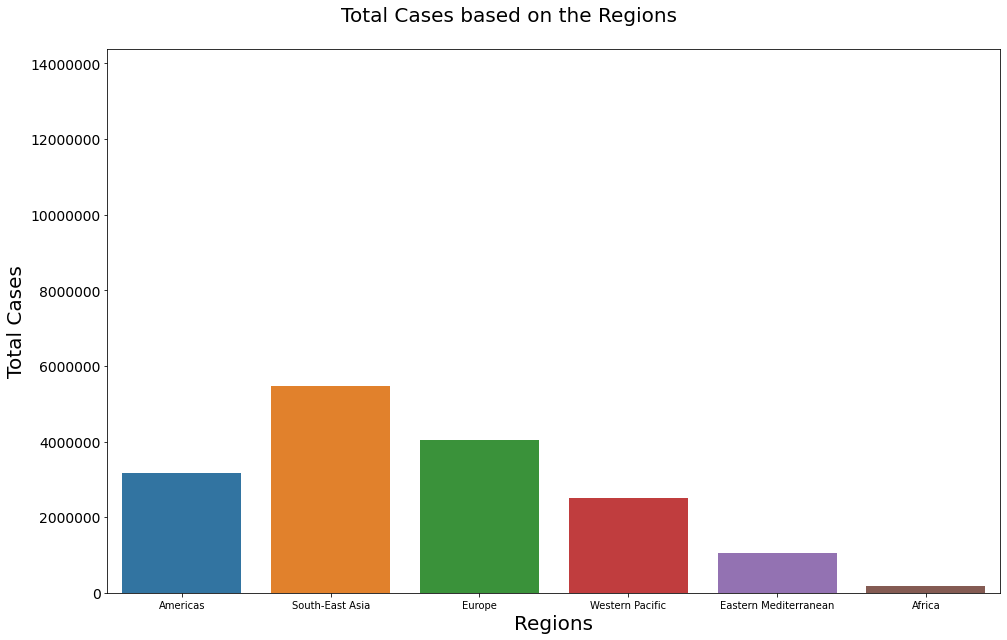

In [6]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=data['Region'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=0, size=10)
plt.yticks(size=14)
plt.xlabel('Regions', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the Regions', fontsize=20, x=0.45, y=1.04)
plt.show()

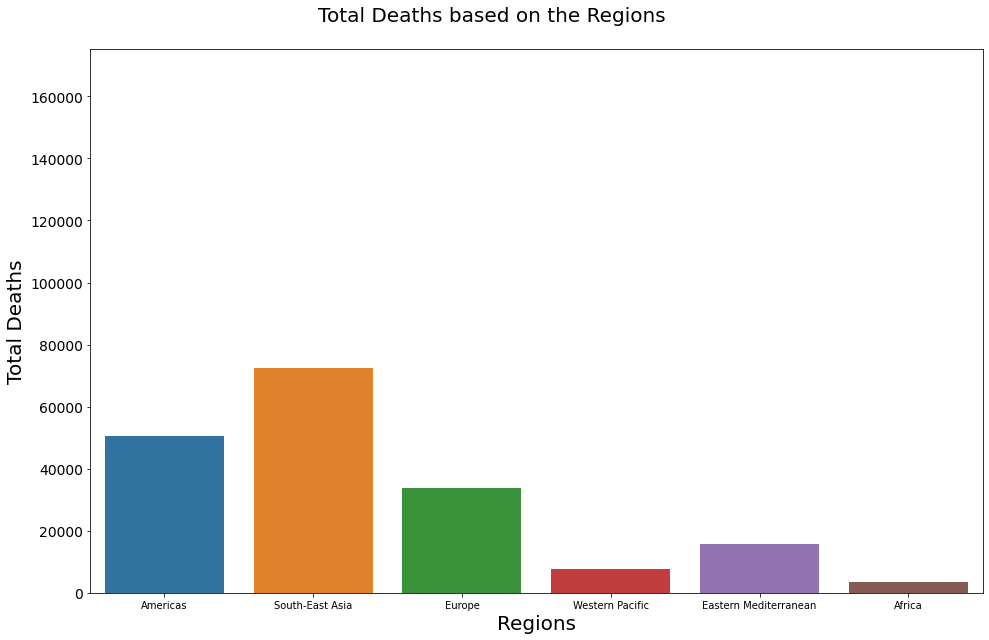

In [7]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=data['Region'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=0, size=10)
plt.yticks(size=14)
plt.xlabel('Regions', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the Regions', fontsize=20, x=0.45, y=1.04)
plt.show()

# Americas Region

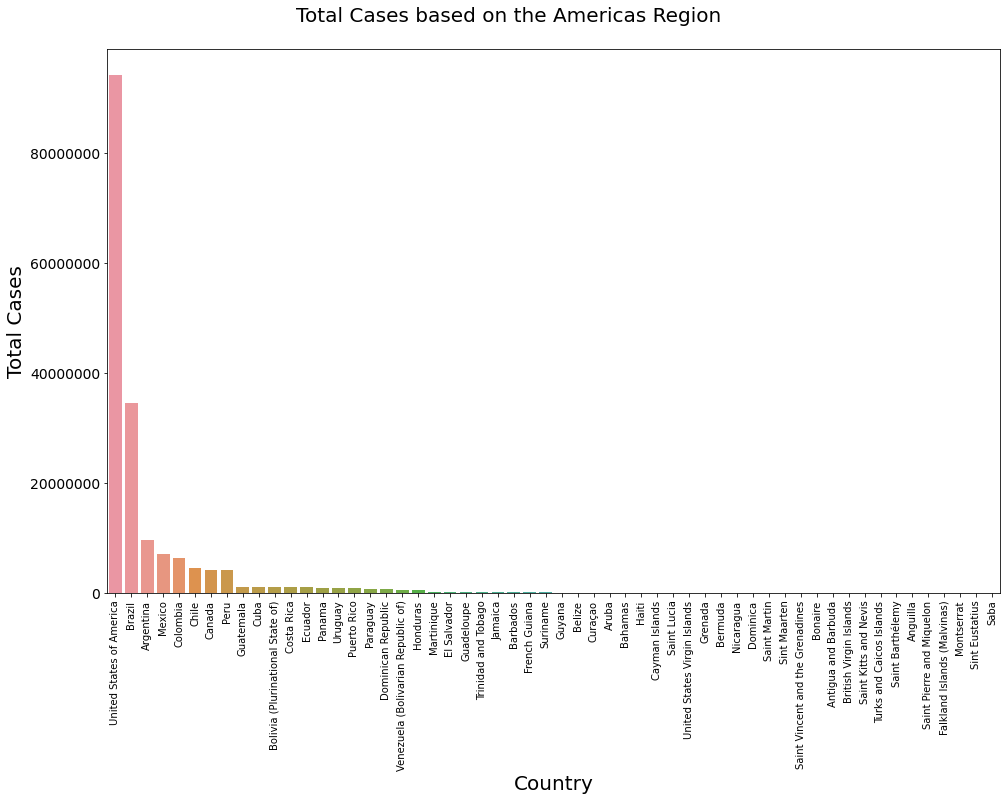

In [8]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Americas['Country'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the Americas Region', fontsize=20, x=0.45, y=1.04)
plt.show()

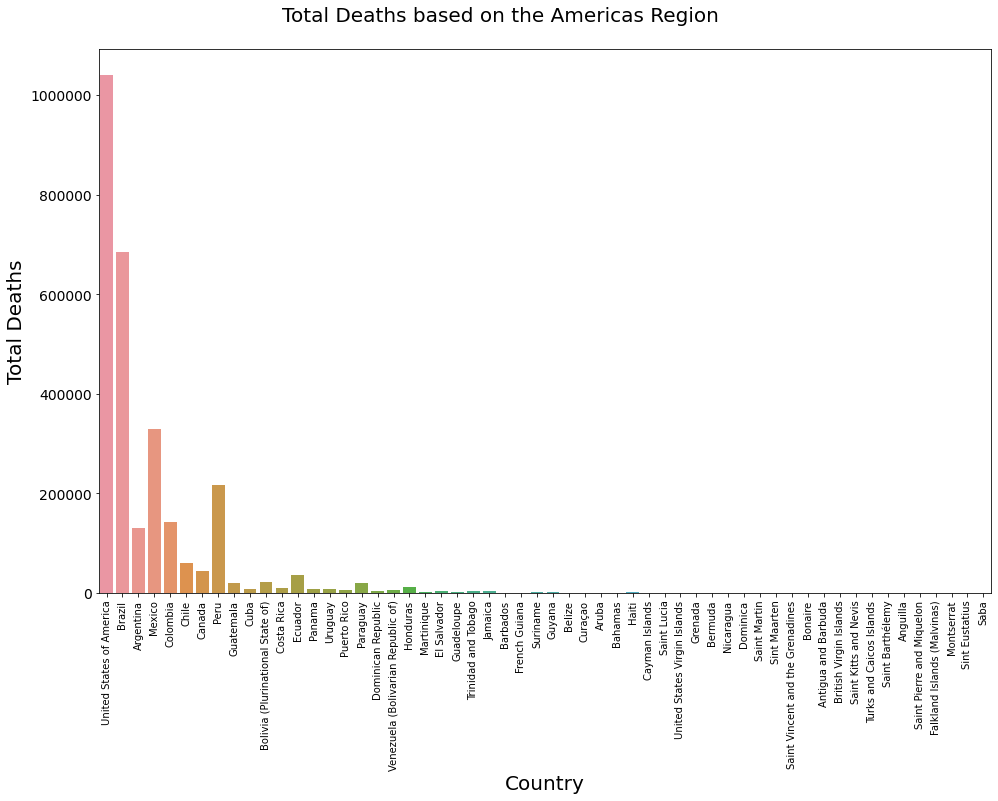

In [9]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Americas['Country'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the Americas Region', fontsize=20, x=0.45, y=1.04)
plt.show()

# SE_Asia

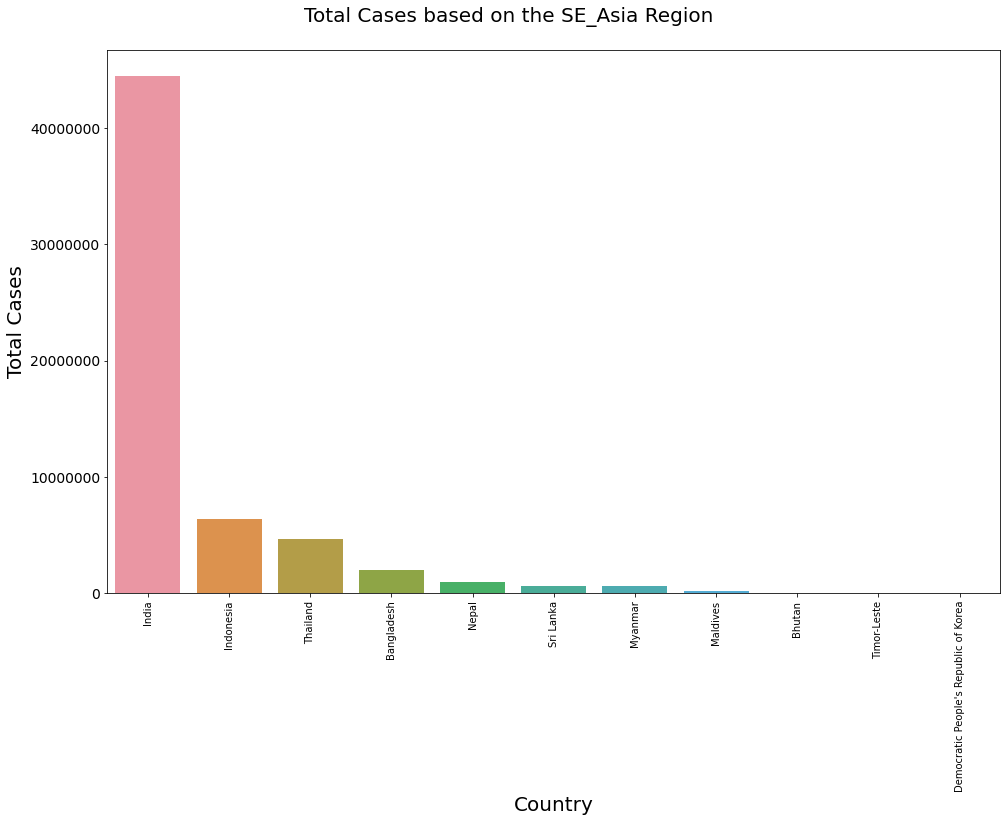

In [10]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=SE_Asia['Country'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the SE_Asia Region', fontsize=20, x=0.45, y=1.04)
plt.show()

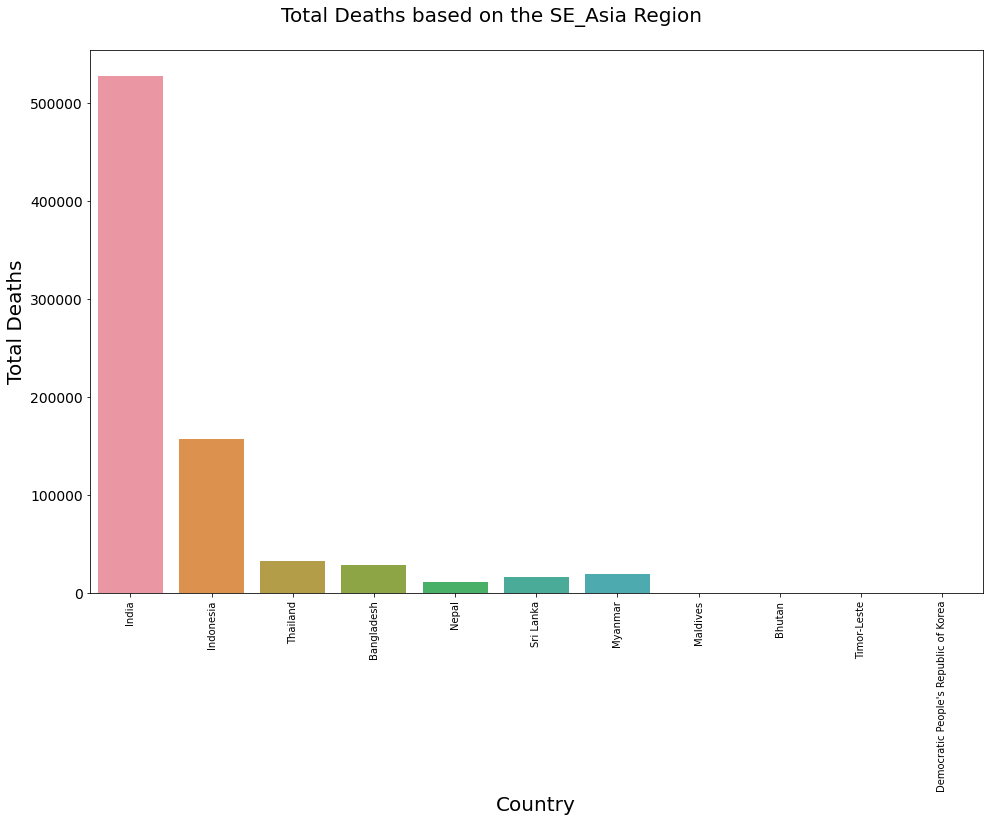

In [11]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=SE_Asia['Country'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the SE_Asia Region', fontsize=20, x=0.45, y=1.04)
plt.show()

# Europe

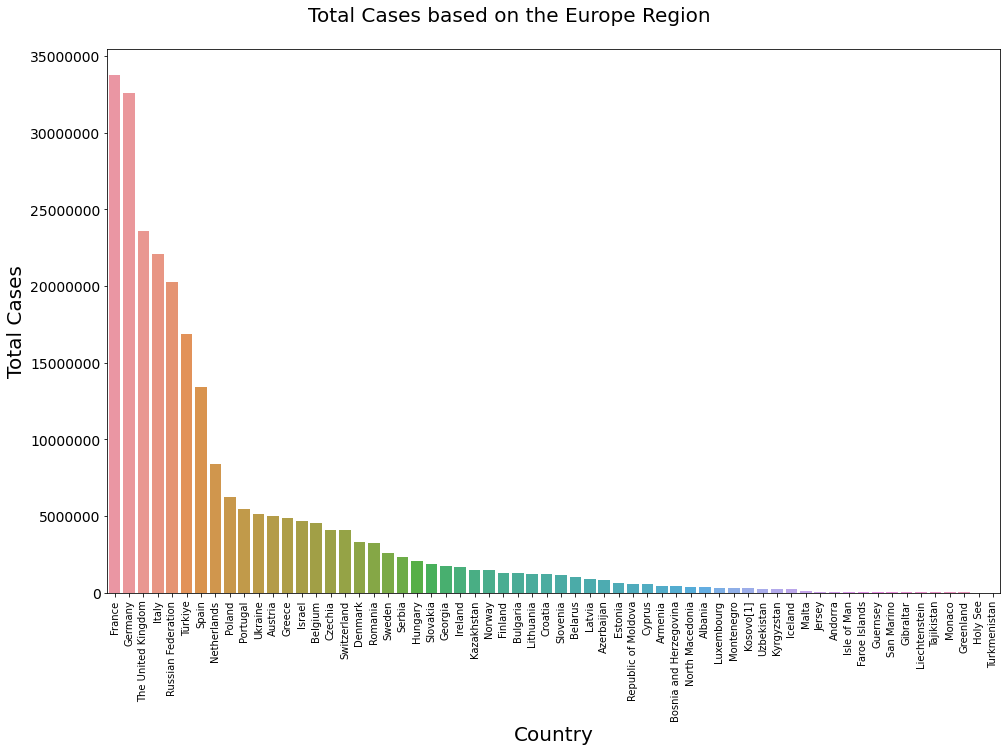

In [12]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Europe['Country'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the Europe Region', fontsize=20, x=0.45, y=1.04)
plt.show()

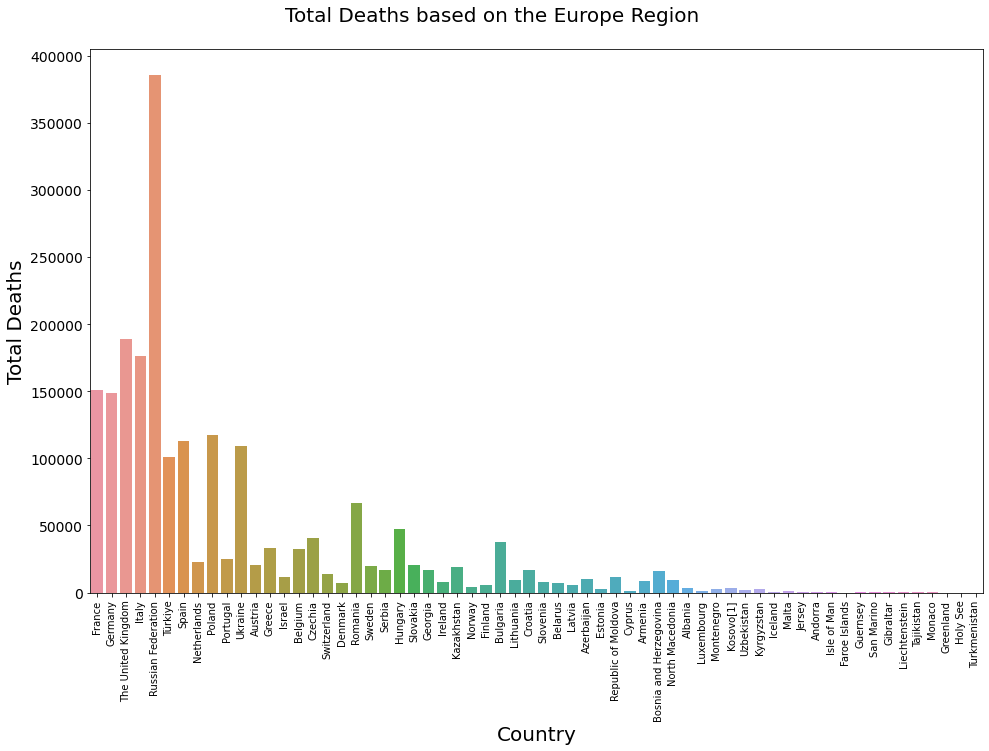

In [13]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Europe['Country'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the Europe Region', fontsize=20, x=0.45, y=1.04)
plt.show()

# Western_Pacific

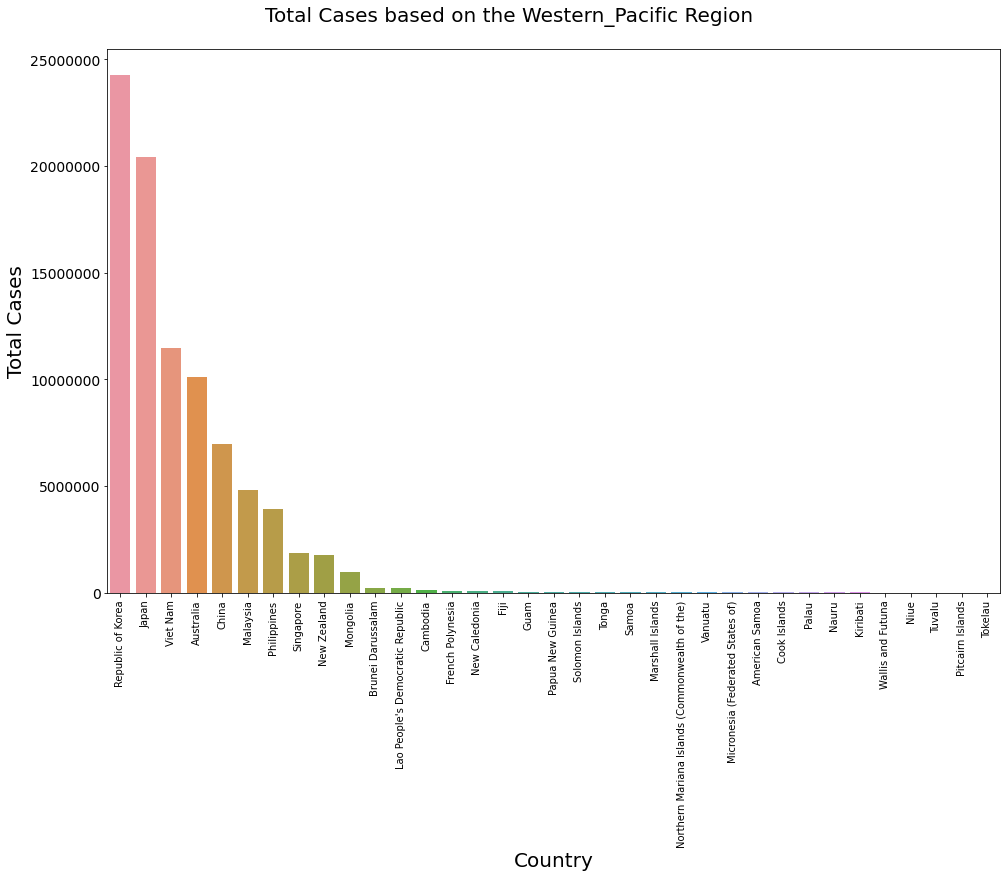

In [14]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Western_Pacific['Country'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the Western_Pacific Region', fontsize=20, x=0.45, y=1.04)
plt.show()

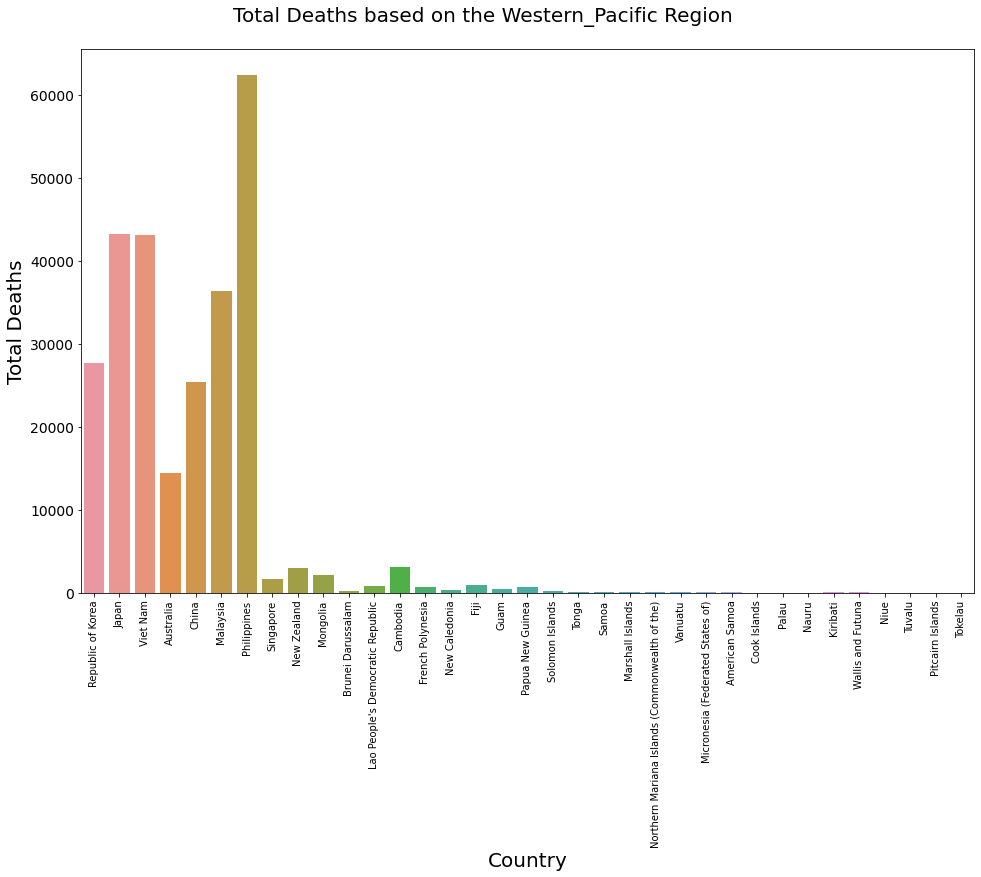

In [15]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Western_Pacific['Country'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the Western_Pacific Region', fontsize=20, x=0.45, y=1.04)
plt.show()

# East_Medi

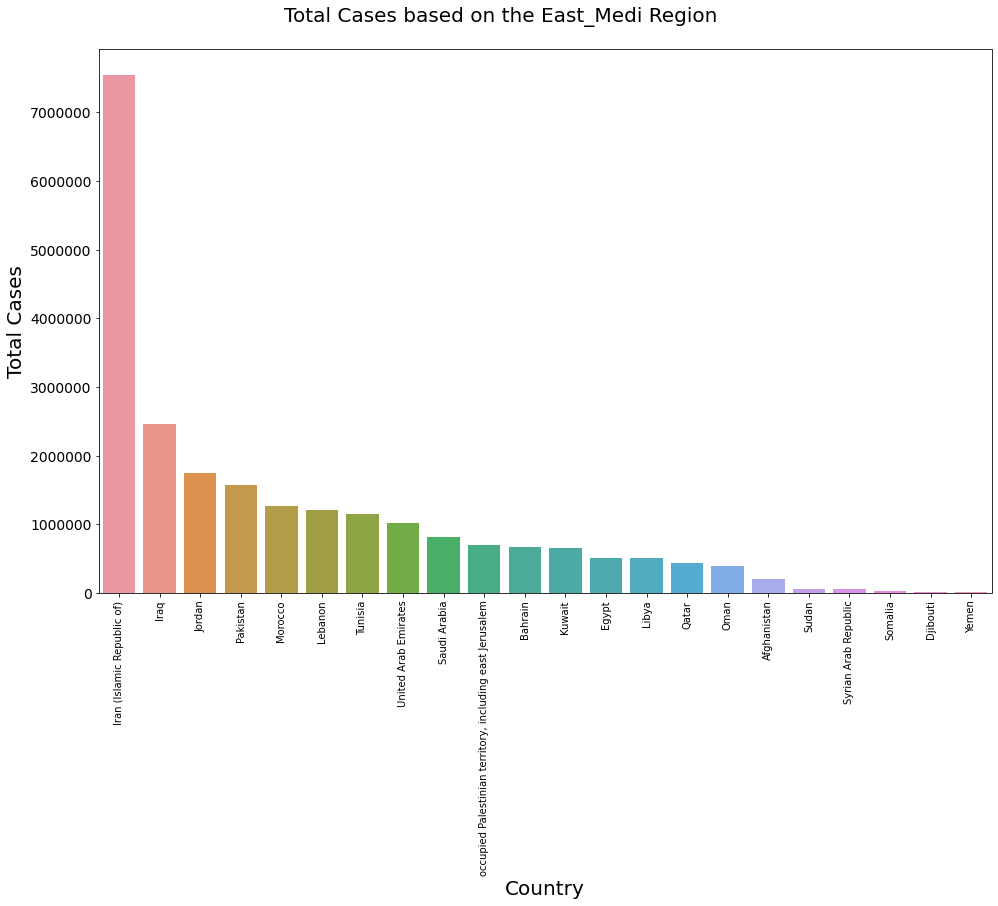

In [16]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=East_Medi['Country'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the East_Medi Region', fontsize=20, x=0.45, y=1.04)
plt.show()

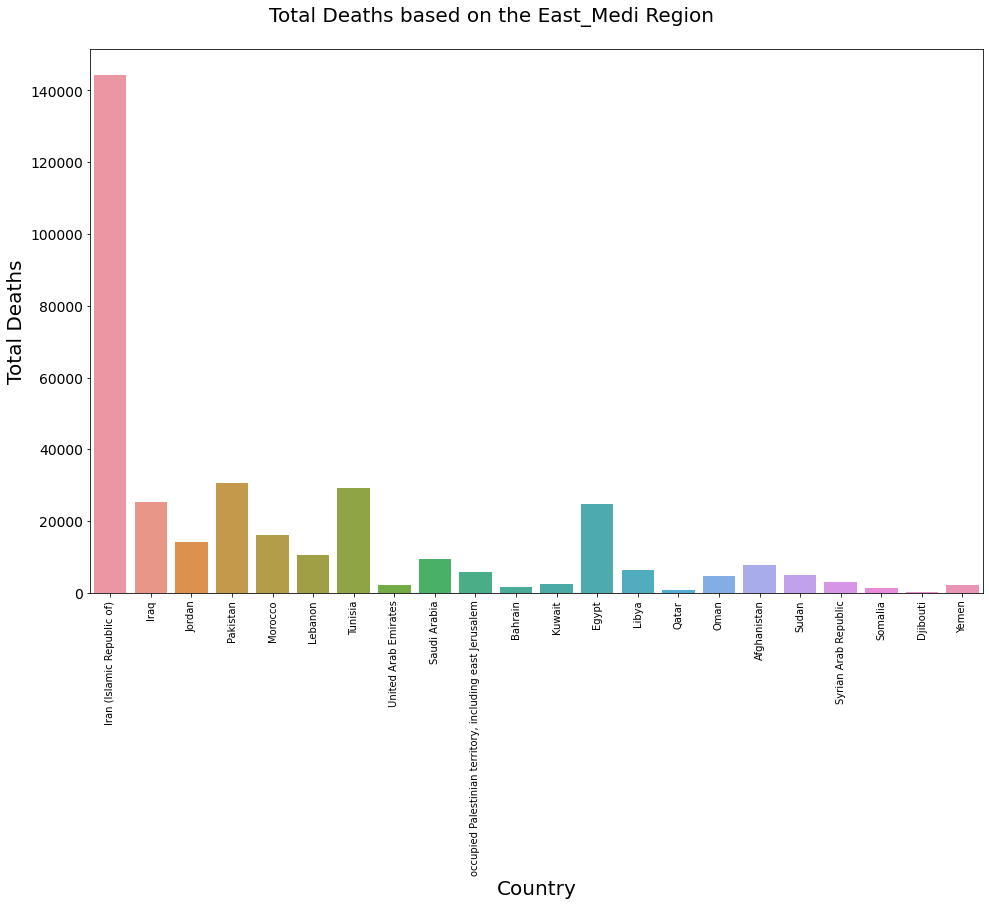

In [17]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=East_Medi['Country'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the East_Medi Region', fontsize=20, x=0.45, y=1.04)
plt.show()

# Africa

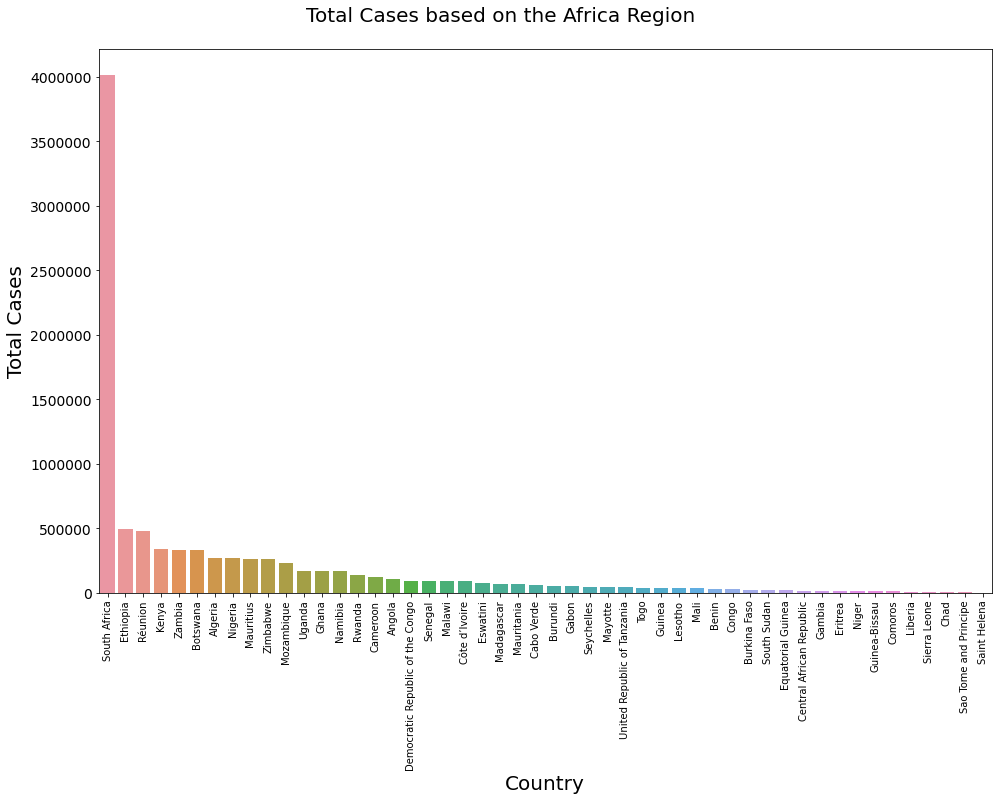

In [18]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Africa['Country'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the Africa Region', fontsize=20, x=0.45, y=1.04)
plt.show()

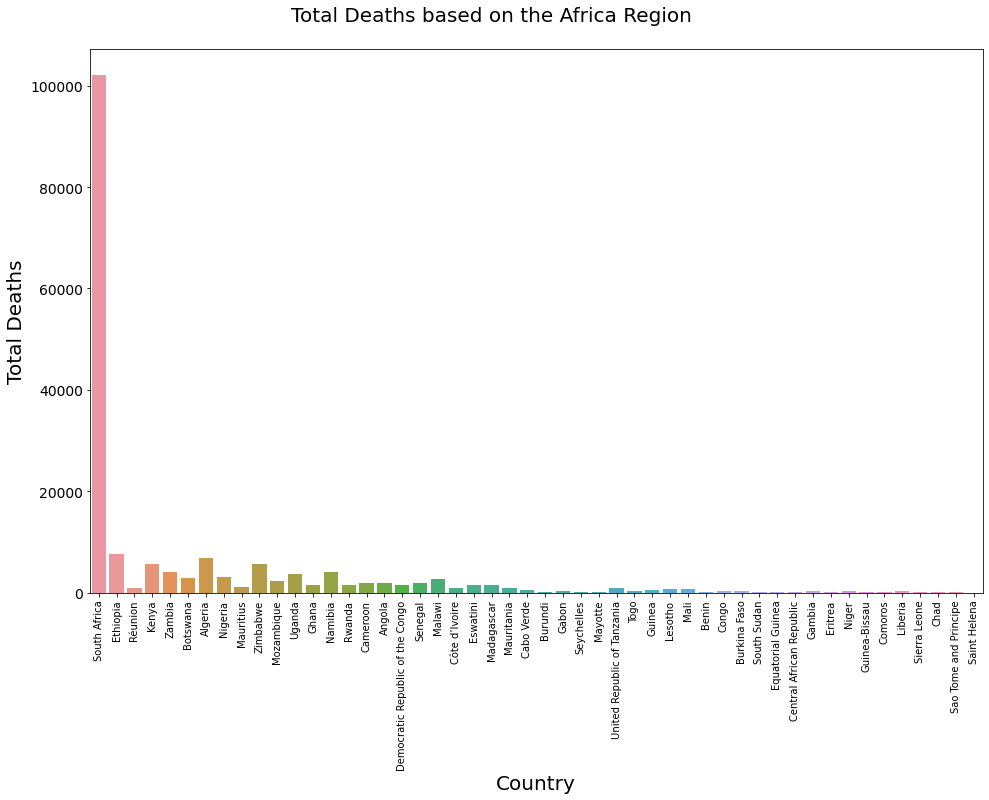

In [19]:
plt.figure(figsize=(16,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=Africa['Country'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the Africa Region', fontsize=20, x=0.45, y=1.04)
plt.show()

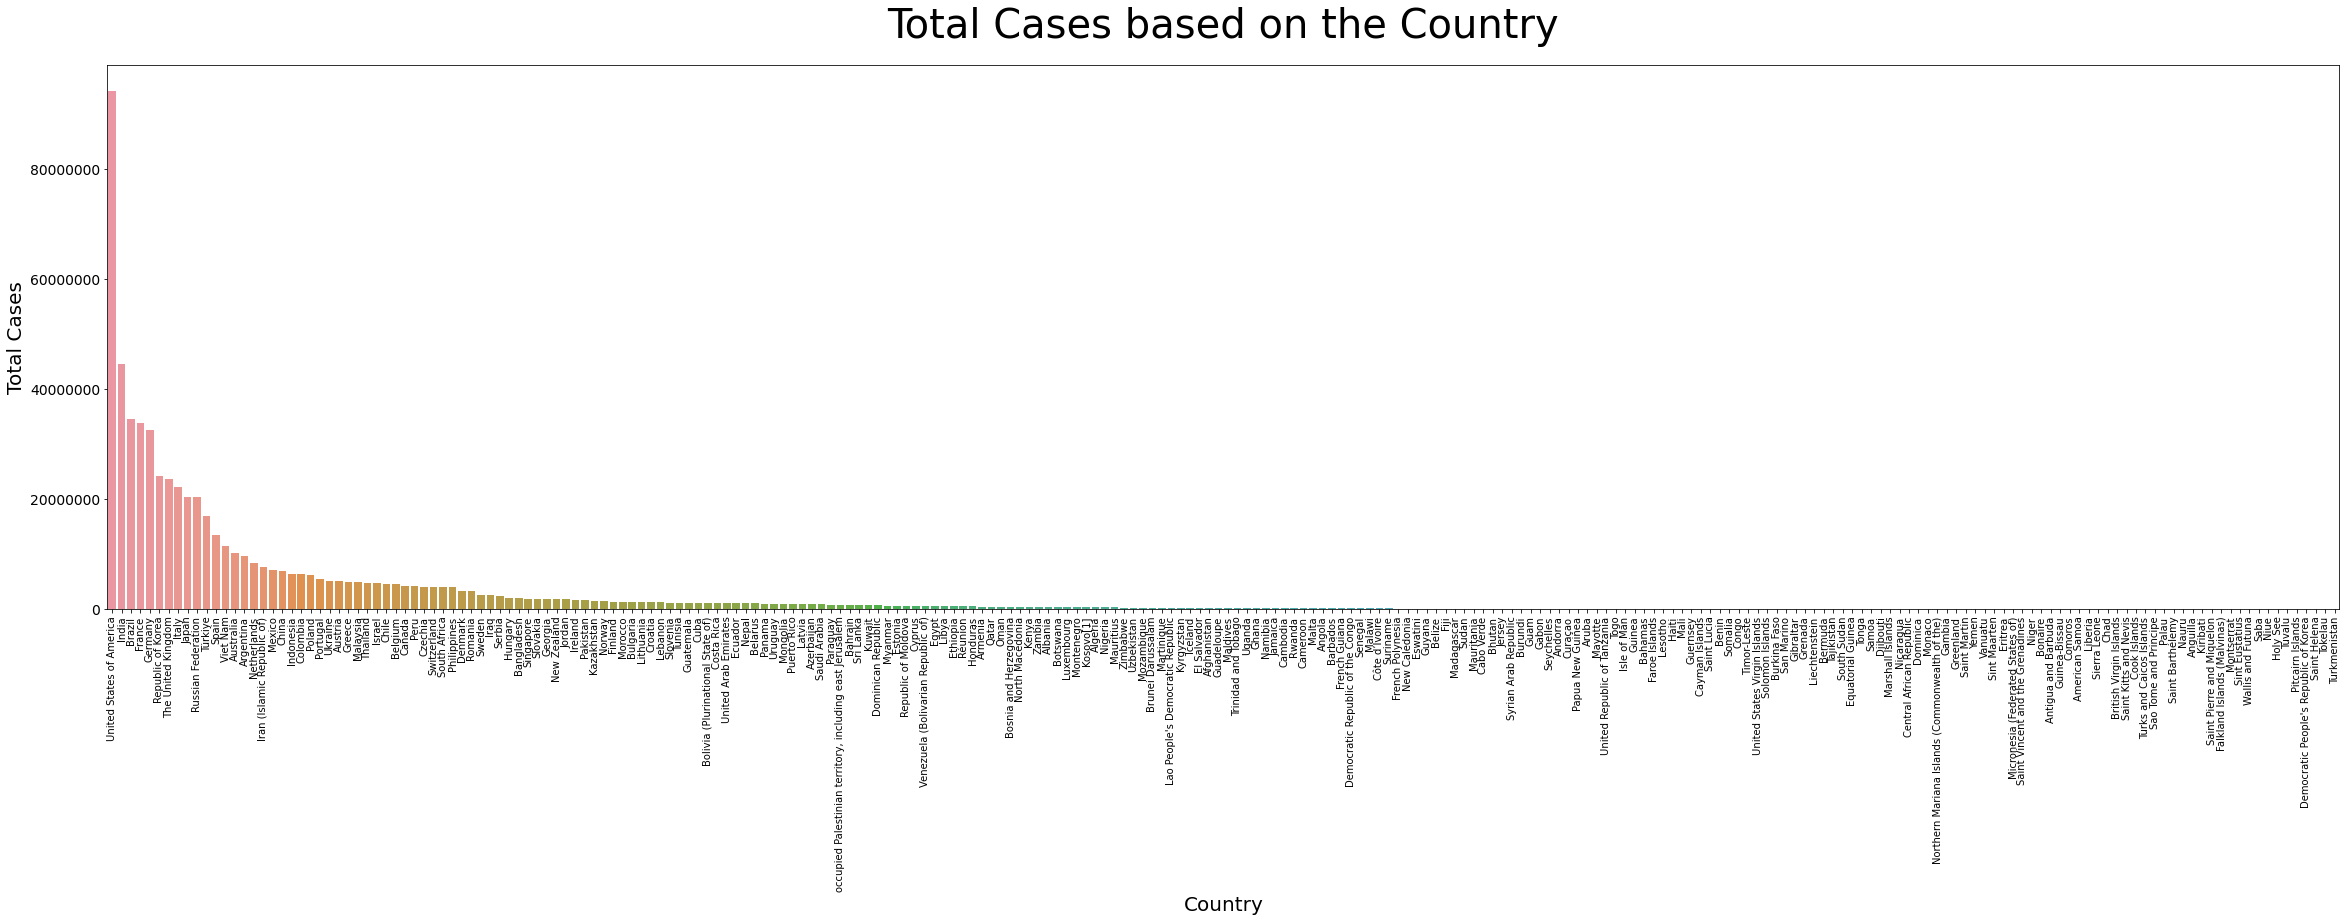

In [20]:
plt.figure(figsize=(40,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=data['Country'], y=data['Total Cases'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Total Cases based on the Country', fontsize=40, x=0.5, y=1.04)
plt.show()

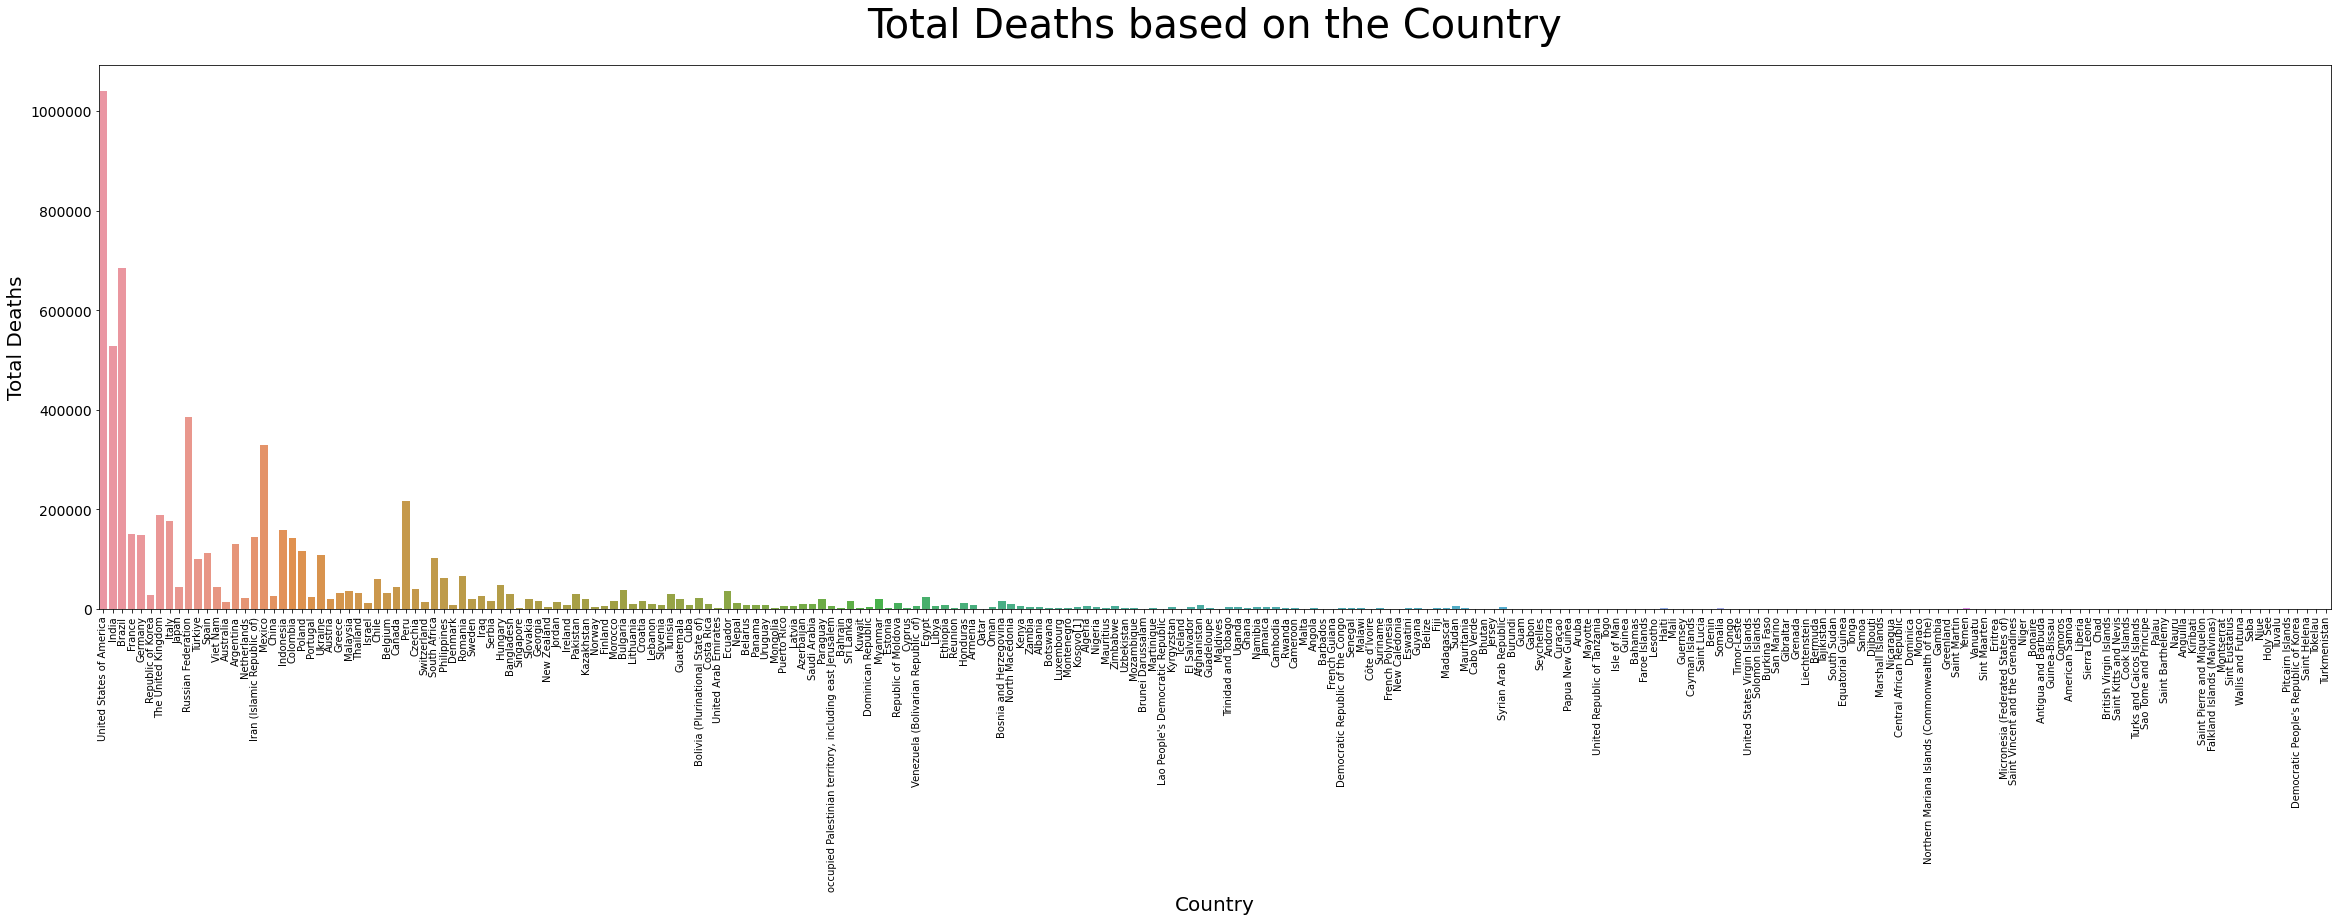

In [21]:
plt.figure(figsize=(40,10))
plt.ticklabel_format(useOffset=False, style='plain')
sns.barplot(x=data['Country'], y=data['Total Deaths'], errwidth=0)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Deaths', fontsize=20)
plt.title('Total Deaths based on the Country', fontsize=40, x=0.5, y=1.04)
plt.show()